In [3]:
##Importing the required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (9,5)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import seaborn as sns
sns.set_style('darkgrid')

In [8]:
##Reading the data
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.shape

(6234, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [9]:
##Drop of useless columns
df1 = df.copy()
df1.drop(['show_id'],axis=1, inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6234 non-null   object
 1   title         6234 non-null   object
 2   director      4265 non-null   object
 3   cast          5664 non-null   object
 4   country       5758 non-null   object
 5   date_added    6223 non-null   object
 6   release_year  6234 non-null   int64 
 7   rating        6224 non-null   object
 8   duration      6234 non-null   object
 9   listed_in     6234 non-null   object
 10  description   6234 non-null   object
dtypes: int64(1), object(10)
memory usage: 535.9+ KB


In [8]:
df1.country.value_counts()

United States                     2032
India                              777
United Kingdom                     348
Japan                              176
Canada                             141
                                  ... 
United Kingdom, Singapore            1
Pakistan, United Arab Emirates       1
Colombia, United States              1
Japan, Canada                        1
Australia, New Zealand               1
Name: country, Length: 554, dtype: int64

In [10]:
df1.isnull().sum()

type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
 df2 = df1.dropna()

In [12]:
df2.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
##Convert into date time format
df2['date_added']=pd.to_datetime(df2['date_added'],errors='coerce')

C:\Users\Shivam\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          3774 non-null   object        
 1   title         3774 non-null   object        
 2   director      3774 non-null   object        
 3   cast          3774 non-null   object        
 4   country       3774 non-null   object        
 5   date_added    3774 non-null   datetime64[ns]
 6   release_year  3774 non-null   int64         
 7   rating        3774 non-null   object        
 8   duration      3774 non-null   object        
 9   listed_in     3774 non-null   object        
 10  description   3774 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 353.8+ KB


In [17]:
##To check if data is in realistic bounds.
df2.describe() 

,release_year
count,3774.000000
mean,2012.087440
std,9.566944
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2017.000000
max,2020.000000


In [19]:
df2.shape

(3774, 11)

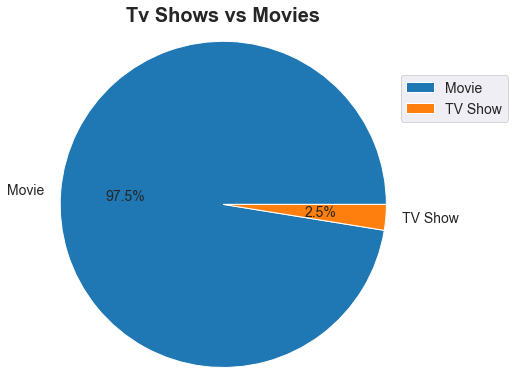

In [20]:
##Visualization
content = df2.type.value_counts()
plt.pie(content.values, labels=content.index, autopct='%1.1f%%', radius=1.5)
plt.legend(content.index, loc="upper center", bbox_to_anchor=(1.35, 1),ncol=1)
plt.title('Tv Shows vs Movies',y=1.15, fontsize=20,weight='bold')
plt.show()

In [5]:
##Year-Wise Content growth
##Extra col is added for calc.
df2['year_added']=pd.DatetimeIndex(df2.date_added).year

NameError: name 'df2' is not defined

In [23]:
##Function to Calculate number of movie or TV Shows
def count_year(df,type_content,start_year,end_year):
    count=[]
    for i in range(start_year,end_year+1):
        m=len(df.loc[(df.type==type_content) & (df.year_added==i)])
        count.append(m)
    return count


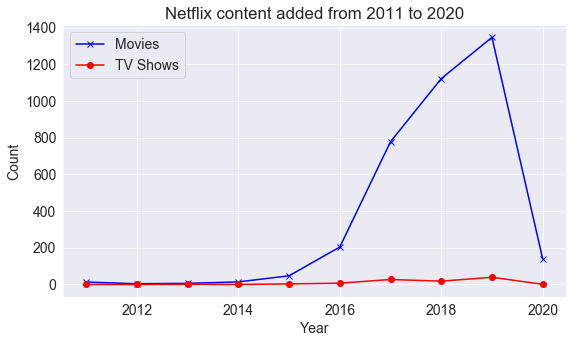

In [25]:
years = range(2011, 2021)
movies = count_year(df2,'Movie',2011,2020)
tv_shows = count_year(df2, 'TV Show',2011,2020)
plt.plot(years,movies,'b-x')
plt.plot(years,tv_shows,'r-o')
plt.legend(['Movies','TV Shows'])
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Netflix content added from 2011 to 2020')
plt.show()

In [26]:
##Country Wise Netflix Content
df2.country.value_counts()

United States                                   1323
India                                            707
United Kingdom                                   152
Canada                                            78
Spain                                             72
                                                ... 
Canada, United States, United Kingdom              1
Philippines, Qatar                                 1
Russia, United States                              1
United States, France, Italy, United Kingdom       1
Uruguay, Spain, Mexico                             1
Name: country, Length: 433, dtype: int64

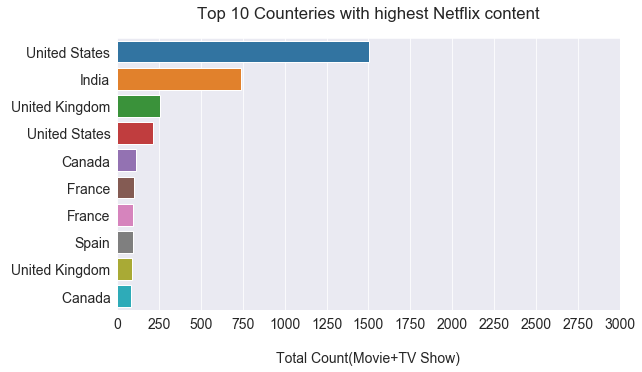

In [28]:
country_count = pd.Series(df2.country.str.split(',').sum()).value_counts()
counteries = country_count.head(10).index
content_count = country_count.head(10).values
sns.barplot(y=counteries,x=content_count);
plt.title("Top 10 Counteries with highest Netflix content",y=1.05);
plt.xlabel('Total Count(Movie+TV Show)', labelpad=20);
plt.xticks(range(0,3250,250));

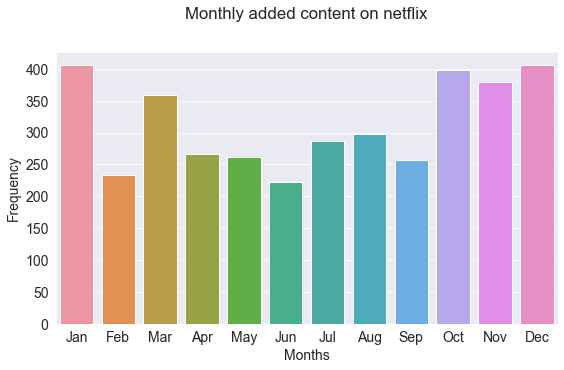

In [14]:
##Monthly Content
monthly_content = pd.DatetimeIndex(df2.date_added).month.value_counts().sort_index()
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
plt.title("Monthly added content on netflix",y=1.1)
sns.barplot(y=monthly_content.values,x=order);
plt.xlabel("Months")
plt.ylabel("Frequency");

C:\Users\Shivam\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


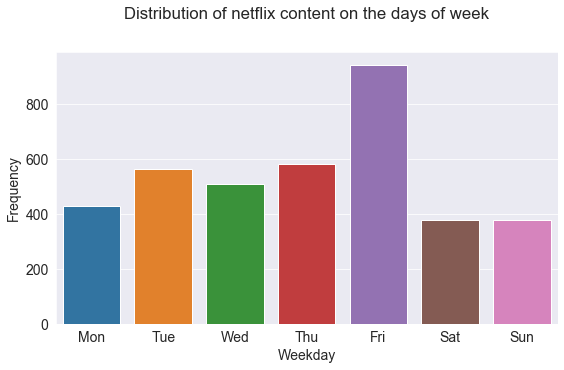

In [15]:
##Day of week the content is uploaded
df2['weekday'] = pd.DatetimeIndex(df2.date_added).weekday
z = df2.weekday.value_counts().sort_index()
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(x=order,y=z.values);
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.title("Distribution of netflix content on the days of week", y=1.1);